# Задание 3. Pandas (HW)
### Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.  
Результат прислать в формате ссылки на Github с ноутбуком

In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ вспомогательных таблиц

### lectures.csv : Статичтика для лекций, просмотренных студентами по мере их обучения.

**lecture_id**: внешний ключ для столбца content_type_id в train.csv, если тип материала - лекция (1).  
**part**: раздел, к которому относится лекция.  
**tag**: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.  
**type_of**: краткое описание основной цели лекции.

In [5]:
# считываю данные из файла lectures.csv в датафрейм lect_df
lect_df = pd.read_csv('data/lectures.csv') 
# вывожу размерность lect_df
lect_df.shape 

(418, 4)

In [6]:
# вывожу 5 первых строк lect_df
lect_df.head() 

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [7]:
# вывожу статистику по числовым признакам lect_df
lect_df.describe() 

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [8]:
# в lect_df пустые ячейки отсутсвуют
lect_df.isna().sum() 

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [9]:
# в lect_df дубликаты отсутсвуют
lect_df.duplicated().sum() 

0

In [10]:
# вывожу справку о количестве данных в столбцах и тип данных в lect_df
lect_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [11]:
# вывожу распеределение внешних ключей по различным разделам лекций
lect_df[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


<AxesSubplot: xlabel='part', ylabel='tag'>

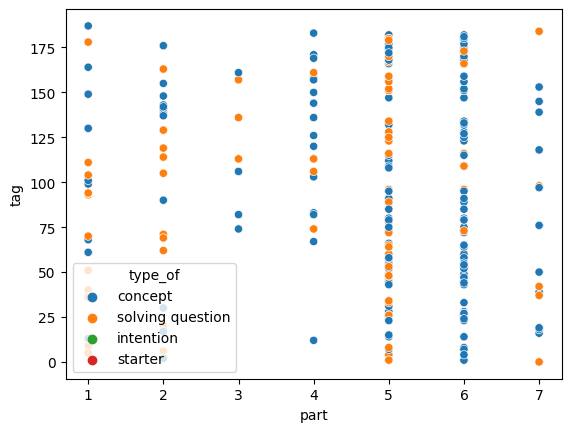

In [12]:
# вывожу распеределение тегов и разделов
sns.scatterplot(data = lect_df, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='tag', ylabel='Count'>

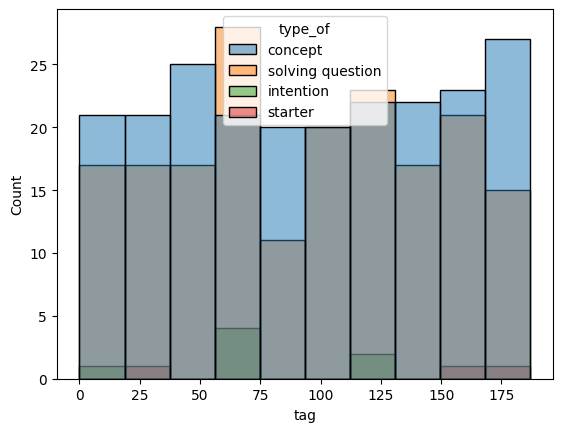

In [13]:
# не вижу зависимости тегов и описаний лекций
sns.histplot(data = lect_df, x = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='part', ylabel='Count'>

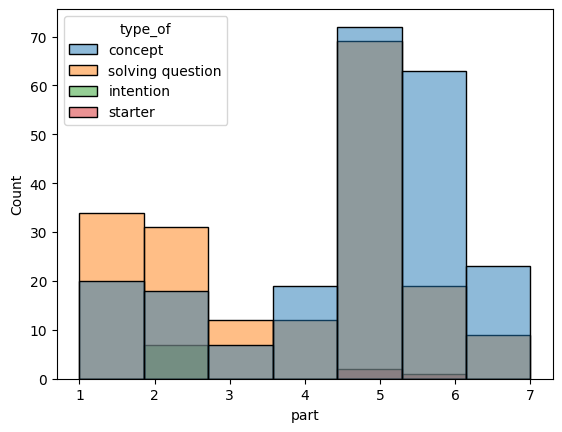

In [14]:
# вывожу связь разделов и описаний лекций: 
# в первых 3-х разделах больше практических заданий, в остальных - теоретическая часть
sns.histplot(data = lect_df, x = 'part', hue = 'type_of', bins = 7)

### questions.csv : статистические данные заданных студентам вопросов.

**question_id**: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).  
**bundle_id**: идентификатор совместного набора вопросов.  
**correct_answer**: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.  
**part**: соответствующий раздел теста TOEIC.  
**tags**: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

In [15]:
qst_df = pd.read_csv('data/questions.csv') # считываем данные из файла questions.csv в qst_df
qst_df.shape # выводим размерность qst_df

(13523, 5)

In [16]:
# вывожу первые 5 строк qst_df
qst_df.head() 

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [17]:
# статистика по числовым признакам qst_df
qst_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [18]:
# ищу пропуски в qst_df
qst_df.isna().sum()  
# eсть 1 в столбце tags

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [19]:
# вывожу пропуск в столбце tags
qst_df[qst_df.tags.isna()] 

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [20]:
# ищу дубликаты qst_df они отсутствуют
qst_df.duplicated().sum() 

0

In [21]:
# вывожу данные о кол-ве значений в столбцах и тип данных qst_df
qst_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [22]:
# вывожу кол-во значений внешних ключей, соответствующих каждому значению в столбце по разделам
qst_df[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<AxesSubplot: xlabel='part', ylabel='Count'>

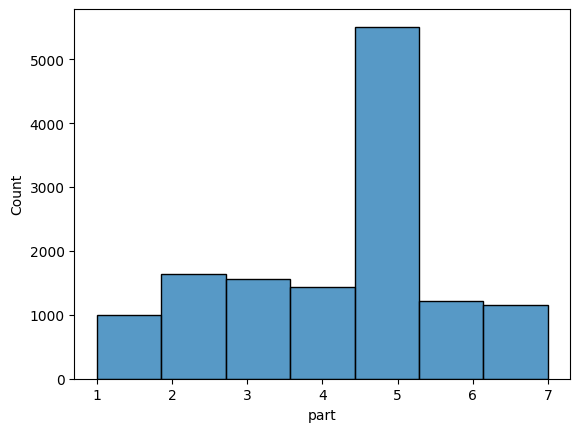

In [23]:
# внешние ключи распределены практически равномерно по всем разделам, в пятом разделе есть неравномерность распределения
sns.histplot(data = qst_df, x = 'part', bins = 7)

## Анализ основной таблицы

### train.csv : статистические данные ответов на заданные студентам вопросы.

**row_id**: (int64) идентификатор строки.  
**timestamp**: (int64) время в миллисекундах между этим взаимодействием со студентом и завершением первого события от данного студента.  
**user_id**: (int32) идентификатор студента.  
**content_id**: (int16) идентификатор взаимодействия со студентом.  
**content_type_id**: (int8) идентификатор типа контента. 0, если контентом был заданный студенту вопрос, 1 - просмотр студентом лекции.  
**task_container_id**: (int16) идентификатор набора вопросов или лекций. Например, студент может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий идентификатор набора.  
**user_answer**: (int8) ответ студента на вопрос, если они есть. Для лекций считать -1 как null.  
**answered_correctly**: (int8) был ли ответ студента на вопрос правильным. Для лекций считать -1 как null.  
**prior_question_elapsed_time**: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.  
**prior_question_had_explanation**: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

In [70]:
# считываем 5000000 строк из файла train.csv в trn_df
trn_df = pd.read_csv('data/train.csv', nrows= 20000000) 
trn_df.shape # вывожу размерность trn_df
# пришлось ограничить количество строк т.к. обработка данных занимала много времени

(20000000, 10)

In [71]:
trn_df.head() # вывожу 5 первых строк trn_dfq

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


### Анализ числовых признаков

In [72]:
# смотрю на то, какие есть категориальные и числовые столбцы
cat_columns = []
num_columns = []

for column_name in trn_df.columns:
    if (trn_df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов =', len(cat_columns))
print('Числовые данные:\t ', num_columns, '\n Число столблцов =', len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов = 9


In [73]:
# статистика по числовым признакам trn_df
trn_df.describe() 

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,1.953207e+07
mean,1.000000e+07,7.587279e+09,2.156968e+08,5.221063e+03,1.949385e-02,8.877931e+02,1.376012e+00,6.253473e-01,2.541891e+04
std,5.773503e+06,1.149166e+10,1.242805e+08,3.869841e+03,1.382528e-01,1.347738e+03,1.193460e+00,5.227578e-01,1.989928e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,5.000000e+06,5.187953e+08,1.067638e+08,2.063000e+03,0.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,1.000000e+07,2.629432e+09,2.167479e+08,5.030000e+03,0.000000e+00,3.750000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.500000e+07,9.773781e+09,3.235100e+08,7.422000e+03,0.000000e+00,1.066000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,2.000000e+07,8.594535e+10,4.291869e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


### Рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

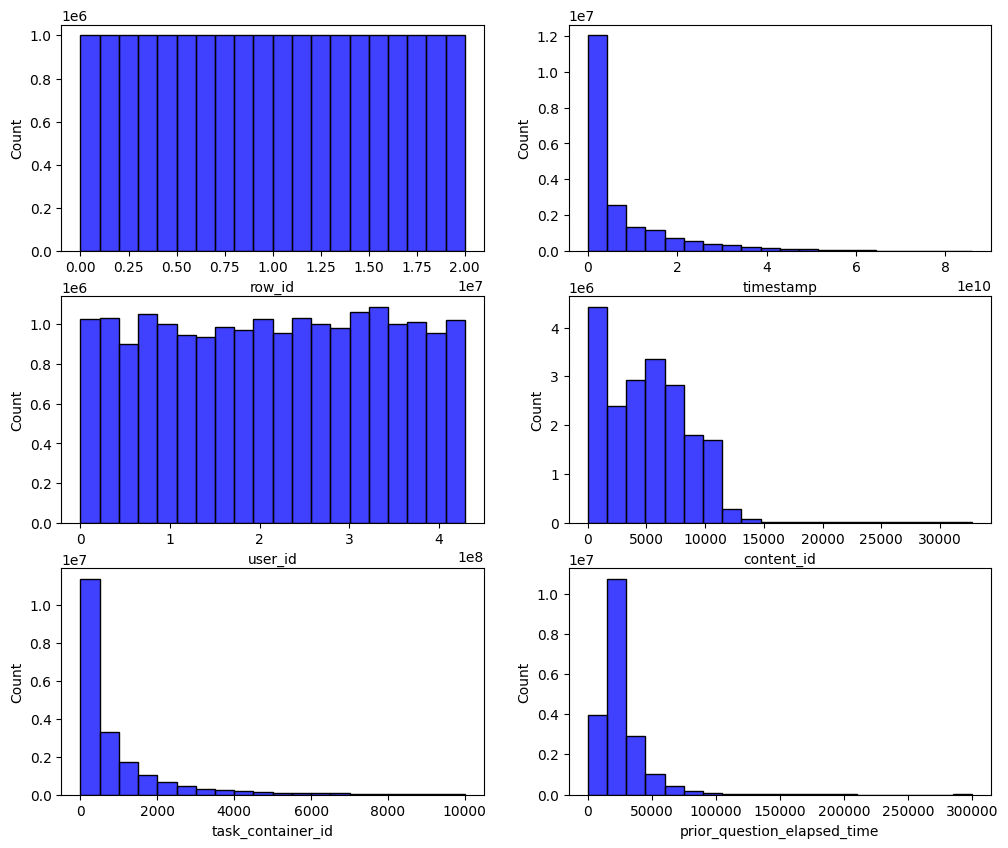

In [74]:
# cначала вывожу столбцы с "большими" значениями
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (12, 10))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = trn_df, x = column_name, bins = 20, color = 'blue')

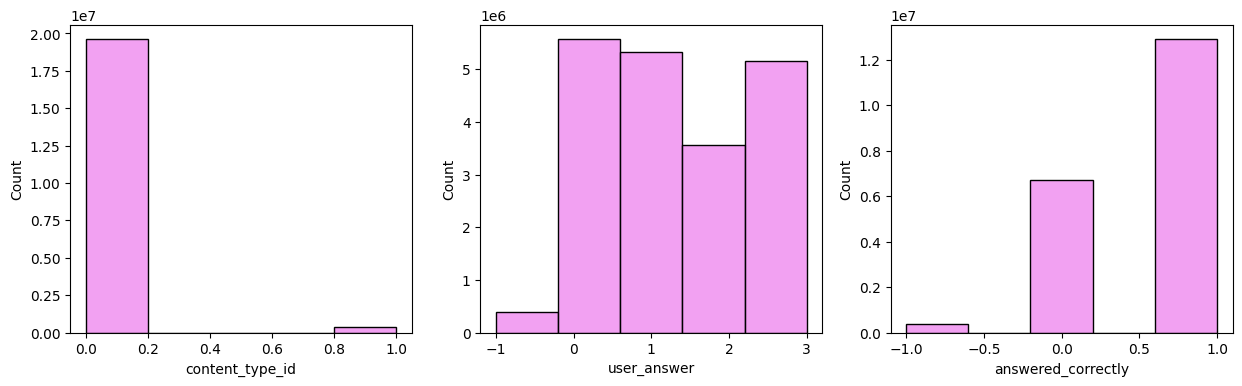

In [75]:
# затем столбцы с "маленькими" значениями
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = trn_df, x = column_name, bins = 5, color = 'violet')

### Очищаем данные

In [76]:
# ищу пропуски в trn_df - есть 467930 в столбце времени ответа
# и 78053 в столбце просмотра объяснений и правильных ответов
trn_df.isna().sum()

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       467930
prior_question_had_explanation     78053
dtype: int64

In [77]:
# вывожу пропуски в столбце времени ответа на каждый вопрос. 
# они объясняются условием: имеют значение null для 1-го набора вопросов или лекции.
trn_df[trn_df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19999728,19999728,3739690327,429186902,16013,1,1056,-1,-1,NaN,False
19999742,19999742,3740714348,429186902,2327,1,1070,-1,-1,NaN,False
19999844,19999844,3916764184,429186902,27845,1,1143,-1,-1,NaN,False
19999925,19999925,4146042369,429186902,25401,1,1203,-1,-1,NaN,False


In [78]:
# вывожу пропуски в столбце просмотра объяснений и правильных ответов. 
# они объясняются условием: имеют значение null для 1-го набора вопросов или лекции.
trn_df[trn_df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19998154,19998154,0,429171967,3727,0,0,2,0,NaN,NaN
19998249,19998249,0,429176554,7900,0,0,0,1,NaN,NaN
19998321,19998321,0,429177936,5406,0,0,0,1,NaN,NaN
19998378,19998378,0,429179439,128,0,0,2,0,NaN,NaN


In [79]:
# ищу дубликаты в trn_df, они отсутствуют
trn_df.duplicated().sum() 

0

In [80]:
# вывожу справку о кол-ве значений в каждом столбце и тип данных trn_df
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 1.5+ GB


**Из представленных графиков и статистических данных можно сделать следующие выводы:**
- столбец **row_id** не представляет интереса для исследования и может быть "исключен"
- trn_df занимает 1.5+ GB памяти
- имеет смысл изменить формат хранения некоторых данных для уменьшения занимаемого объёма памяти, и увеличения скорости исследования

In [81]:
trn_df = trn_df.drop('row_id', axis = 1) # убираю столбец идентификации строки 
# изменяю формат хранения некоторых данных trn_df
trn_df['timestamp'] = trn_df['timestamp'].astype('uint64')
trn_df['user_id'] = trn_df['user_id'].astype('uint32')
trn_df['content_id'] = trn_df['content_id'].astype('uint16')
trn_df['content_type_id'] = trn_df['content_type_id'].astype('int8')
trn_df['task_container_id'] = trn_df['task_container_id'].astype('uint16')
trn_df['user_answer'] = trn_df['user_answer'].astype('int8')
trn_df['answered_correctly'] = trn_df['answered_correctly'].astype('int8')
trn_df['prior_question_elapsed_time'] = trn_df['prior_question_elapsed_time'].astype('float32')
trn_df.info() # вывела справку о кол-ве значений в каждом столбце и типе данных trn_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       uint64 
 1   user_id                         uint32 
 2   content_id                      uint16 
 3   content_type_id                 int8   
 4   task_container_id               uint16 
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 591.3+ MB


In [82]:
# после очистки данных объём занимаемой памяти снизился с 1,5 GB до 591,3 MB
print(round(1500 / 591.3, 1))

2.5


**После очистки данных объём памяти, занимаемой trn_df, уменьшился с 1.5 GB до 591.3 MB, т.е. в 2.5 раза!**

### Рассмотрим корреляцию числовых признаков и их связь с успеваемостью студентов

In [92]:
cm = sns.color_palette("vlag", as_cmap = True)
trn_df_corr = trn_df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
trn_df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,0.000929,0.052347,0.000928,0.418723,0.000707,0.024568,0.012501
user_id,0.000929,1.000000,0.001799,-0.000204,0.005370,-0.000314,-0.000132,-0.004439
content_id,0.052347,0.001799,1.000000,0.415811,0.042288,-0.107344,-0.198648,0.151080
content_type_id,0.000928,-0.000204,0.415811,1.000000,-0.019398,-0.280714,-0.438399,nan
task_container_id,0.418723,0.005370,0.042288,-0.019398,1.000000,0.008630,0.058217,-0.016697
user_answer,0.000707,-0.000314,-0.107344,-0.280714,0.008630,1.000000,0.126985,0.014332
answered_correctly,0.024568,-0.000132,-0.198648,-0.438399,0.058217,0.126985,1.000000,-0.008316
prior_question_elapsed_time,0.012501,-0.004439,0.151080,nan,-0.016697,0.014332,-0.008316,1.000000


In [93]:
# добавляю столбец cor_ratio - соотношение количества правильных ответов к общему количеству ответов студентов
trn_df_corr['cor_ratio'] = trn_df_corr.answered_correctly / trn_df_corr.user_answer
# вывожу новую корреляцию числовых признаков
trn_df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,0.000929,0.052347,0.000928,0.418723,0.000707,0.024568,0.012501,0.023690
user_id,0.000929,1.000000,0.001799,-0.000204,0.005370,-0.000314,-0.000132,-0.004439,0.000127
content_id,0.052347,0.001799,1.000000,0.415811,0.042288,-0.107344,-0.198648,0.151080,0.079188
content_type_id,0.000928,-0.000204,0.415811,1.000000,-0.019398,-0.280714,-0.438399,nan,0.245443
task_container_id,0.418723,0.005370,0.042288,-0.019398,1.000000,0.008630,0.058217,-0.016697,0.037919
user_answer,0.000707,-0.000314,-0.107344,-0.280714,0.008630,1.000000,0.126985,0.014332,-0.530821
answered_correctly,0.024568,-0.000132,-0.198648,-0.438399,0.058217,0.126985,1.000000,-0.008316,0.531130
prior_question_elapsed_time,0.012501,-0.004439,0.151080,nan,-0.016697,0.014332,-0.008316,1.000000,-0.016964
cor_ratio,0.023690,0.000127,0.079188,0.245443,0.037919,-0.530821,0.531130,-0.016964,1.000000


In [94]:
# удаляю столбцы не связанные со столбцом успеваемости
trn_df_corr.drop(trn_df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
# вывожу обновлённую корреляцию числовых признаков
trn_df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.280714,-0.438399,0.245443
user_answer,-0.280714,1.000000,0.126985,-0.530821
answered_correctly,-0.438399,0.126985,1.000000,0.531130
cor_ratio,0.245443,-0.530821,0.531130,1.000000


<AxesSubplot: xlabel='cor_ratio', ylabel='Count'>

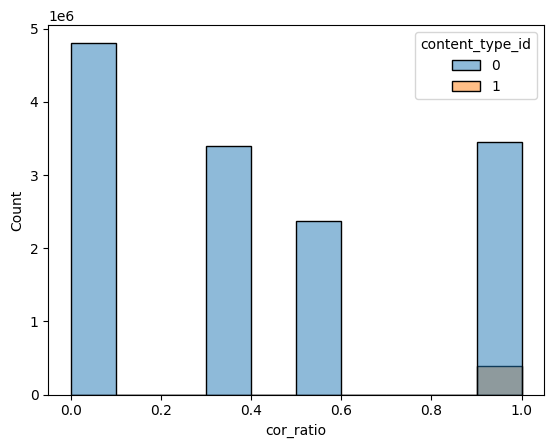

In [95]:
# вывожу распеределение успеваваемости студентов
sns.histplot(data = trn_df_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 10)

**По представленной корреляции числовых признаков видно, что помимо исходных для неё признаков успеваемость слабо зависит от типа контента (вопрос или лекция).**

### Рассмотрим статистику ответов студентов  

In [96]:
# ищем кол-во уникальных идентификаторов студента
trn_df.agg({'user_id': pd.Series.nunique}) 

user_id    78267
dtype: int64

In [97]:
# разбиваю на группы общее кол-во ответов и кол-во правильных ответов каждого студента по его идентификатору в unic_df
unic_df = trn_df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
unic_df.head()


,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


In [98]:
# вывожу статистику ответов студентов
unic_df.describe() 

,user_id,user_answer,answered_correctly
count,7.826700e+04,78267.000000,78267.000000
mean,2.146480e+08,351.619993,159.798472
std,1.240384e+08,1022.862809,497.496787
min,1.150000e+02,0.000000,-2.000000
25%,1.069205e+08,37.000000,11.000000
50%,2.147494e+08,59.000000,22.000000
75%,3.217601e+08,215.000000,93.000000
max,4.291869e+08,23016.000000,13312.000000


In [99]:
# сокращаю разброс количества ответов студентов
def rem_emission(trn_df, col, k_std): # задаю функцию сокращения разброса ответов
        mean = trn_df[col].mean() # среднее значение переданного столбца col
        std_o = trn_df[col].std() # стандартное отклонение переданного столбца col
        return trn_df[(trn_df[col] <= mean + (k_std * std_o))]

unic_df = rem_emission(unic_df, 'user_answer', 1) # вызываем функцию сокращения разброса ответов
# добавляю столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
unic_df['cor_ratio'] = unic_df.answered_correctly / unic_df.user_answer
unic_df # вывожу первые 5 и последние 5 строк полученного unic_df

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
78261,429158923,23,9,0.391304
78262,429171967,113,51,0.451327
78263,429176554,98,39,0.397959
78264,429177936,73,42,0.575342


In [100]:
unic_df.describe() # вывожу статистику ответов студентов с новым столбцом

,user_id,user_answer,answered_correctly,cor_ratio
count,7.362700e+04,73627.000000,73627.000000,7.362600e+04
mean,2.146587e+08,161.927092,69.556739,inf
std,1.239997e+08,245.557148,114.554544,NaN
min,1.150000e+02,0.000000,-2.000000,-5.263158e-02
25%,1.072040e+08,36.000000,11.000000,2.918809e-01
50%,2.146948e+08,55.000000,20.000000,3.905788e-01
75%,3.217233e+08,159.000000,68.000000,4.715002e-01
max,4.291794e+08,1374.000000,859.000000,inf


### Вычисляем медианное значение количества ответов студентов

In [101]:
a_per_user_med = unic_df.user_answer.median()
print('Медианное значение количества ответов студентов: ', a_per_user_med)

Медианное значение количества ответов студентов:  55.0


### Визуализируем данные о количестве ответов студентов

<AxesSubplot: xlabel='user_answer', ylabel='Count'>

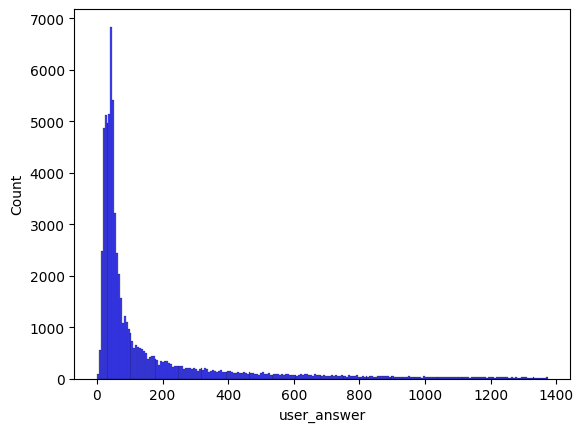

In [102]:
# Выводим распределение кол-ва ответов студентов: заметен перекос в начале
sns.histplot(data = unic_df, x = 'user_answer', color='blue')

0.4282607976327222


<AxesSubplot: >

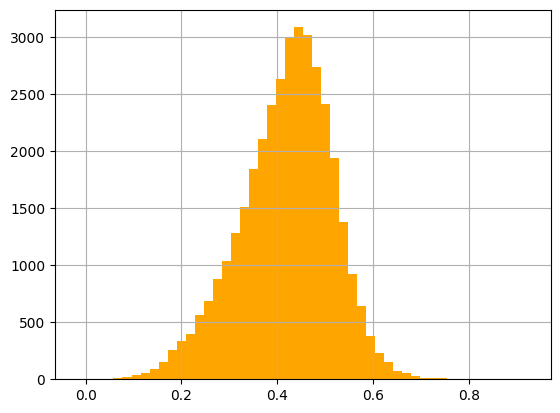

In [103]:
# вывожу распределение кол-ва ответов студентов, которое больше медианного
print(unic_df.query('user_answer > 55')['cor_ratio'].median())
unic_df.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'orange')

0.4498038995106436


<AxesSubplot: >

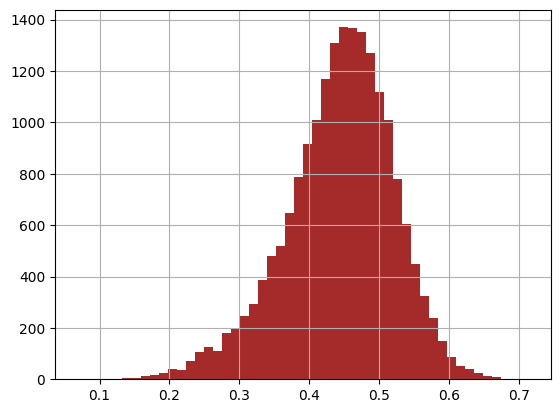

In [104]:
# вывожу распределение кол-ва ответов студентов, которое больше 75%
print(unic_df.query('user_answer > 151')['cor_ratio'].median())
unic_df.query('user_answer > 151')['cor_ratio'].hist(bins = 50, color = 'brown')

0.46034165698799845


<AxesSubplot: >

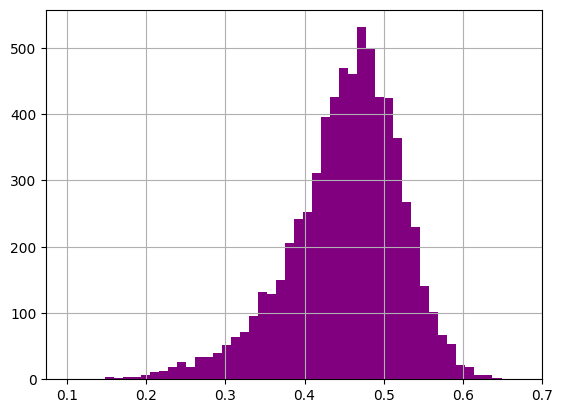

In [105]:
# вывожу распределение кол-ва ответов студентов, которое больше 500
print(unic_df.query('user_answer > 500')['cor_ratio'].median())
unic_df.query('user_answer > 500')['cor_ratio'].hist(bins = 50, color = 'purple')

0.4227091238818025


<AxesSubplot: >

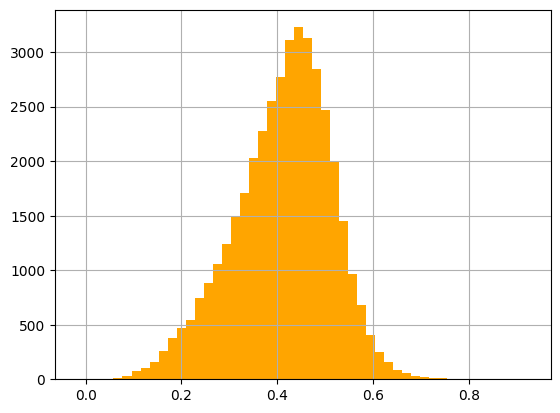

In [106]:
# вывожу распределение кол-ва ответов студентов, которое меньше 50
print(unic_df.query('0 < user_answer > 50')['cor_ratio'].median())
unic_df.query('0 < user_answer > 50')['cor_ratio'].hist(bins = 50, color = 'orange')

#### По представленным графикам видно, что студенты, ответившие на меньше медианного значения количества ответов, справлялись хуже тех, кто ответил больше медианного значения. При этом ответы в количестве гораздо большем медианного значения незначительно сказались на увеличении числа правильных ответов.

## Поищем взаимосвязь времени между взаимодействием со студентом и завершением первого события от него, среднего времени ответа на каждый вопрос и количества правильных ответов с общим количеством ответов студентов

In [107]:
# группирую общее количество ответов, кол-во правильных ответов и время ответа 
# на каждый вопрос студентов по их идентификаторам в corr_look
corr_look = trn_df[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()
# добавляю столбец timestamp_ratio соотношения времени между взаимодействием со студентом 
# и завершением первого события от него к общему количеству ответов студентов
corr_look['timestamp_ratio'] = corr_look['timestamp'] / corr_look['user_answer']
# добавляю столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему кол-ву ответов студентов
corr_look['elapsed_time_ratio'] = corr_look['prior_question_elapsed_time'] / corr_look['user_answer']
# добавляю столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
corr_look['cor_ratio'] = corr_look.answered_correctly / corr_look.user_answer
# удаляю ненужные столбцы
corr_look.drop(corr_look.columns[[0, 2, 3, 4]], axis = 1, inplace = True)
corr_look = rem_emission(corr_look, 'user_answer', 1) # вызываем функцию сокращения разброса ответов
corr_look # выводим первые 5 и последние 5 строк полученного corr_look

,user_answer,timestamp_ratio,elapsed_time_ratio,cor_ratio
0,72,6.524638e+07,12458.319444,0.444444
1,49,2.252203e+05,11122.387755,0.142857
2,31,2.472123e+05,10483.870968,0.322581
3,169,2.879101e+08,26449.704142,0.479290
4,149,2.615750e+08,18923.489933,0.449664
...,...,...,...,...
78261,23,3.167230e+05,28217.391304,0.391304
78262,113,1.898626e+08,19353.982301,0.451327
78263,98,1.518003e+07,20438.755102,0.397959
78264,73,3.795117e+07,12123.287671,0.575342


In [108]:
# явная зависимость между успеваемостью и кол-вом ответов студентов отсутствует

C:\Users\Юленька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot: xlabel='user_answer', ylabel='timestamp_ratio'>

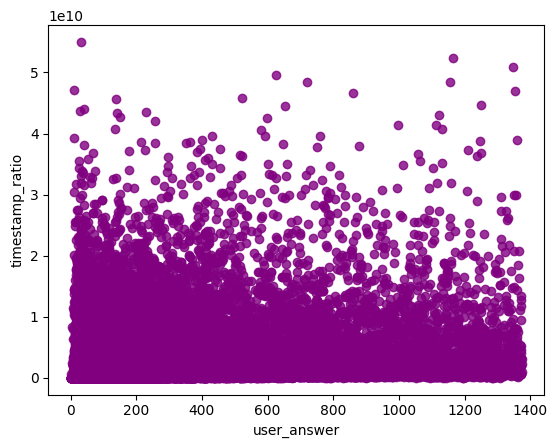

In [109]:
# вывожу соотношение timestamp_ratio к кол-ву ответов студентов: явной зависимости нет
sns.regplot(data = corr_look, x = 'user_answer', y = 'timestamp_ratio', color = 'purple')

<AxesSubplot: xlabel='user_answer', ylabel='elapsed_time_ratio'>

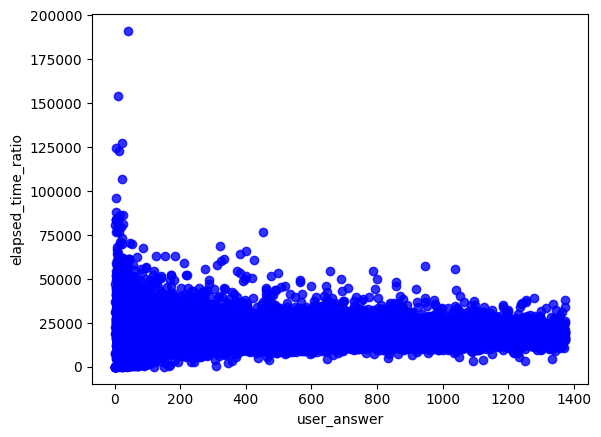

In [110]:
# вывожу соотношение elapsed_time_ratio к кол-ву ответов студентов: явной зависмости нет
sns.regplot(data = corr_look, x = 'user_answer', y = 'elapsed_time_ratio', color = 'blue')

C:\Users\Юленька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Юленька\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot: xlabel='timestamp_ratio', ylabel='cor_ratio'>

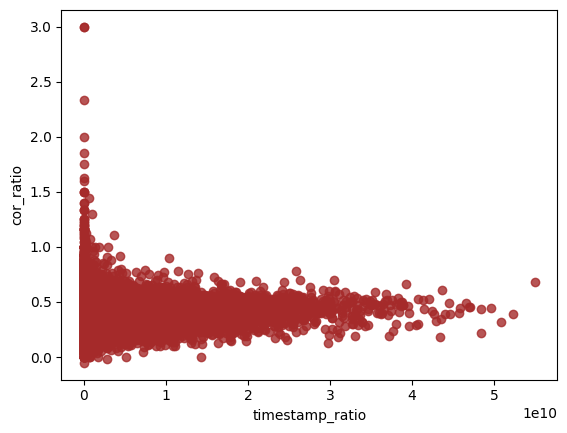

In [111]:
# вывожу соотношение timestamp_ratio к успеваемости: явной зависимости нет
sns.regplot(data = corr_look, x = 'timestamp_ratio', y = 'cor_ratio', color = 'brown')

<AxesSubplot: xlabel='elapsed_time_ratio', ylabel='cor_ratio'>

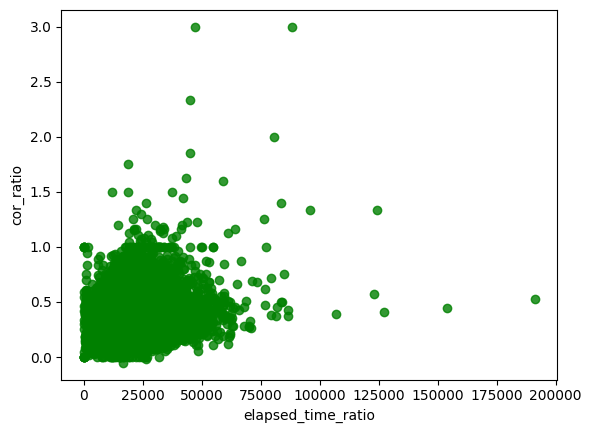

In [112]:
# выявлена зависимость между elapsed_time_ratio и успеваемостью
sns.regplot(data = corr_look, x = 'elapsed_time_ratio', y = 'cor_ratio', color = 'green')

## Итак, на успеваемость студентов влияют следующие характеристики:
- количество ответов студентов, большее медианного значения количества ответов, равного 55
- типа контента (вопрос или лекция) - очень слабо
- соотношения количества правильных ответов и среднего времени ответа на каждый вопрос к общему количеству ответов студентов - слабо
